In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.rcParams["axes.labelsize"] = 14
sns.set_style("whitegrid")

# KNN Plots

## Plot 1: KNN (K and Distance Metrics)

In [3]:
plot1 = pd.read_csv('schaefer_plot1.csv', names=["Type", "Accuracy"])
new = plot1["Type"].str.rsplit("_", n = 1, expand = True) 
plot1['Distance Metric'] = new[0]
plot1['K'] = new[1].astype(int)
plot1.drop(columns =["Type"], inplace = True) 
plot1.head()


,Accuracy,Distance Metric,K
0,0.733824,correlation,1
1,0.762500,correlation,5
2,0.748529,correlation,30
3,0.732353,cosine,1
4,0.760294,cosine,5


In [4]:
print(plot1)
np.mean(plot1['Accuracy'][plot1['K']==30])

   Accuracy Distance Metric   K
0  0.733824     correlation   1
1  0.762500     correlation   5
2  0.748529     correlation  30
3  0.732353          cosine   1
4  0.760294          cosine   5
5  0.747059          cosine  30
6  0.596324       euclidean   1
7  0.600000       euclidean   5
8  0.597794       euclidean  30


0.6977941176470588

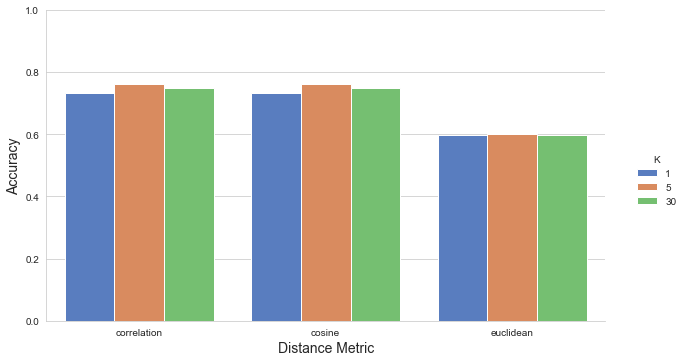

In [5]:
ref_plot = sns.catplot(x="Distance Metric", y="Accuracy", hue="K", data=plot1,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.set_size_inches(10,5)
plt.savefig('plot1.eps', bbox_inches='tight', transparent=True)
plt.show()

## Plot 2: KNN with Tangent Space Transformations

In [24]:
plot2 = pd.read_csv('schaefer_plot2.csv', names=["Type", "Accuracy"])
new = plot2["Type"].str.rsplit("_", n = 1, expand = True) 
plot2['Tangent Reference'] = new[0]
plot2['Parcellation'] = new[1].astype(int)
plot2.drop(columns =["Type"], inplace = True) 
print(plot2)
print(np.mean((plot2[plot2['Tangent Reference']=='euclid'])))
print(np.mean((plot2[0:4]))-np.mean((plot2[8:12])))
print(np.mean((plot2[4:8])))
print(np.mean((plot2[8:12])))

    Accuracy Tangent Reference  Parcellation
0   0.771324            Raw FC           100
1   0.770588               pca           100
2   0.119853            euclid           100
3   0.142647          harmonic           100
4   0.753676            Raw FC           200
5   0.747794               pca           200
6   0.126471            euclid           200
7   0.150735          harmonic           200
8   0.747794            Raw FC           300
9   0.737500               pca           300
10  0.124265            euclid           300
11  0.119853          harmonic           300
Accuracy          0.123529
Parcellation    200.000000
dtype: float64
Accuracy          0.01875
Parcellation   -200.00000
dtype: float64
Accuracy          0.444669
Parcellation    200.000000
dtype: float64
Accuracy          0.432353
Parcellation    300.000000
dtype: float64


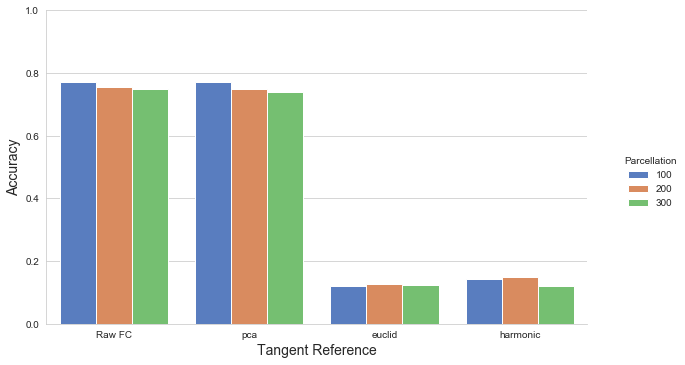

In [7]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Parcellation", data=plot2,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.set_size_inches(10,5)
plt.savefig('plot2.eps', bbox_inches='tight', transparent=True)
plt.show()

## Plot 3: KNN with different levels of PCA components transformations

In [8]:
plot3 = pd.read_csv('schaefer_plot3.csv', header=None)
new = plot3[0].str.split('\t', n=1, expand=True)
plot3['% Components'] = 100 * new[0].astype(float)
plot3['Accuracy'] = new[1].astype(float)
plot3.drop(columns=[0], inplace=True)
plot3.head()

,% Components,Accuracy
0,0.1,0.799265
1,2.0,0.869853
2,4.0,0.856618
3,6.0,0.849265
4,8.0,0.830882


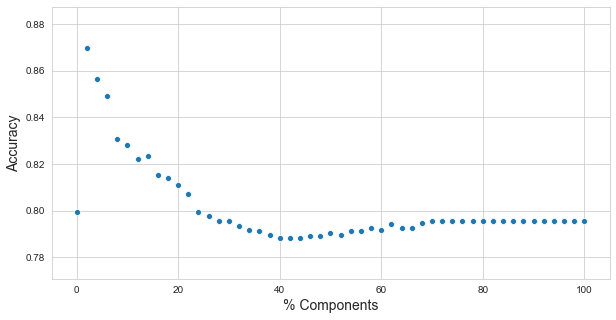

In [9]:
rcParams['figure.figsize'] = 10, 5
ax = sns.scatterplot(x="% Components", y="Accuracy", data=plot3)
plt.savefig('plot3.eps', bbox_inches='tight', transparent=True)
plt.show()

### Plot 4: Zoom in on Plot 3

In [10]:
plot4 = pd.read_csv('schaefer_plot4.csv', names=["Type", "Accuracy"])
new = plot4['Type'].str.split('_', n=1, expand=True)
plot4['# Components'] = new[0].astype(int) - 1
plot4.drop([0], inplace=True)

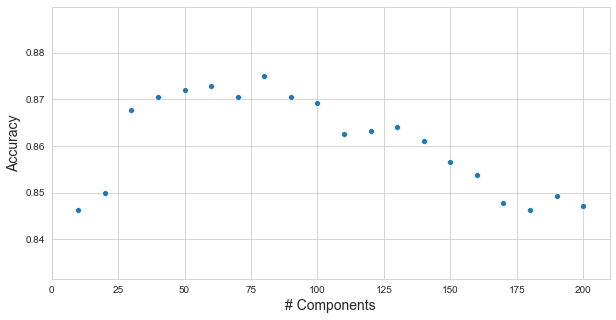

In [11]:
ax = sns.scatterplot(x="# Components", y="Accuracy", data=plot4)
ax.set_xlim(0,210)
plt.savefig('plot4.eps', bbox_inches='tight', transparent=True)
plt.show()

# Deep Learning Plots

## HCP 100 Subjects CNN with 3 Pipelines

In [12]:
sns.set_style("whitegrid")
baseline = pd.read_csv('HCP100_base_E200_LR0.001_R1_S0_Y1_20.csv')
tan_euclidean = pd.read_csv('HCP100_Taneuclid_E200_LR0.001_R1_S0_Y1_20.csv')
pca_recon = pd.read_csv('HCP100_recon_0.025_E200_LR0.001_R0_S0_Y1.csv')
df = pd.concat([baseline['Accuracy'], pca_recon['Accuracy'],
                tan_euclidean['Accuracy']], axis=1,
               keys=['Raw Data', 'PCA: 1% PCs', 'Tangent Projection (Euclidean)'])

In [13]:
df.head()

,Raw Data,PCA: 1% PCs,Tangent Projection (Euclidean)
0,0.904605,0.930921,0.996711
1,0.914474,0.927632,0.993421
2,0.904605,0.921053,1.000000
3,0.924342,0.927632,1.000000
4,0.898026,0.927632,1.000000


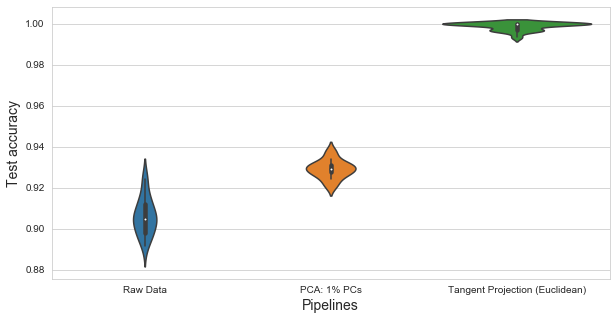

In [14]:
df = df.melt(var_name='Pipelines', value_name='Test accuracy')
ax = sns.violinplot(x="Pipelines", y="Test accuracy", data=df)
fig = ax.get_figure()
fig.set_size_inches(10,5)
plt.savefig('DL_pipelines.eps', bbox_inches='tight', transparent=True)
plt.show()

In [3]:
sns.set_style("whitegrid")
raw100 = pd.read_csv('CNN_schaefer100_raw fc.csv')
raw100['Parcellation'] = 'Schaefer100'
raw100['Pipeline'] = 'Raw Data'
raw200 = pd.read_csv('CNN_schaefer200_raw fc.csv')
raw200['Parcellation'] = 'Schaefer200'
raw200['Pipeline'] = 'Raw Data'
pca100 = pd.read_csv('CNN_schaefer100_pca.csv')
pca100['Parcellation'] = 'Schaefer100'
pca100['Pipeline'] = 'PCA Recomp: 80 PCs'
pca200 = pd.read_csv('CNN_schaefer200_pca.csv')
pca200['Parcellation'] = 'Schaefer200'
pca200['Pipeline'] = 'PCA Recomp: 80 PCs'
tan100 = pd.read_csv('CNN_schaefer100_euclid.csv')
tan100['Parcellation'] = 'Schaefer100'
tan100['Pipeline'] = 'Tangent Projection (Euclidean)'
tan200 = pd.read_csv('CNN_schaefer200_euclid.csv')
tan200['Parcellation'] = 'Schaefer200'
tan200['Pipeline'] = 'Tangent Projection (Euclidean)'
result = pd.concat([raw100, raw200, pca100, pca200, tan100, tan200])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


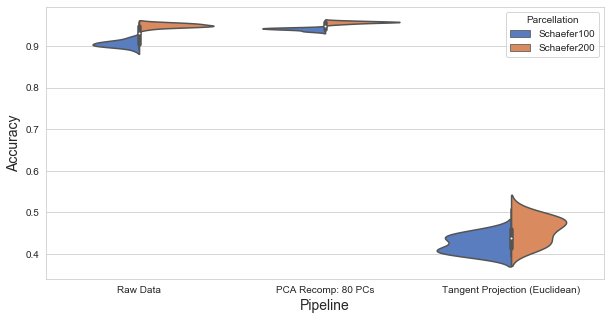

In [17]:
ax = sns.violinplot(x="Pipeline", y="Accuracy", hue="Parcellation",
                    data=result, palette="muted", split=True, legend=False)
fig = ax.get_figure()

fig.set_size_inches(10,5)
plt.savefig('DL_pipelines_schaefer.eps', bbox_inches='tight', transparent=True)
plt.show()

In [9]:
print(np.mean((tan200['Accuracy'],raw200['Accuracy'], pca200['Accuracy']))-np.mean((tan100['Accuracy'],raw100['Accuracy'], pca100['Accuracy'])))


0.031269958241218365


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


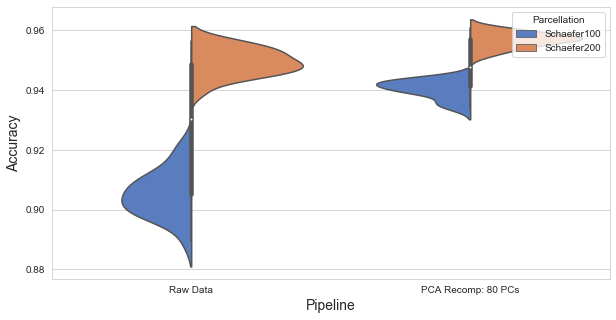

In [18]:
result = pd.concat([raw100, raw200, pca100, pca200])
ax = sns.violinplot(x="Pipeline", y="Accuracy", hue="Parcellation",
                    data=result, palette="muted", split=True, legend=False)
fig = ax.get_figure()

fig.set_size_inches(10,5)
plt.savefig('DL_pipelines_schaefer_notan.eps', bbox_inches='tight', transparent=True)
plt.show()

In [52]:
np.mean(tan100['Accuracy'])

0.42468680913780404

0     False
1     False
2     False
3     False
4     False
      ...  
15    False
16    False
17    False
18    False
19    False
Name: Parcellation, Length: 80, dtype: bool

## Unrelated Subset (n=71) in Schaefer Parcellation

In [18]:
sns.set_style("whitegrid")
raw100 = pd.read_csv('CNN_schaefer100_raw fc_unrelated.csv')
raw100['Parcellation'] = 'Schaefer100'
raw100['Pipeline'] = 'Raw Data'
raw200 = pd.read_csv('CNN_schaefer200_raw fc_unrelated.csv')
raw200['Parcellation'] = 'Schaefer200'
raw200['Pipeline'] = 'Raw Data'
pca100 = pd.read_csv('CNN_schaefer100_pca_unrelated.csv')
pca100['Parcellation'] = 'Schaefer100'
pca100['Pipeline'] = 'PCA Recomp: 80 PCs'
pca200 = pd.read_csv('CNN_schaefer200_pca_unrelated.csv')
pca200['Parcellation'] = 'Schaefer200'
pca200['Pipeline'] = 'PCA Recomp: 80 PCs'
tan100 = pd.read_csv('CNN_schaefer100_euclid_unrelated.csv')
tan100['Parcellation'] = 'Schaefer100'
tan100['Pipeline'] = 'Tangent Projection (Euclidean)'
tan200 = pd.read_csv('CNN_schaefer200_euclid_unrelated.csv')
tan200['Parcellation'] = 'Schaefer200'
tan200['Pipeline'] = 'Tangent Projection (Euclidean)'
result = pd.concat([raw100, raw200, pca100, pca200, tan100, tan200])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


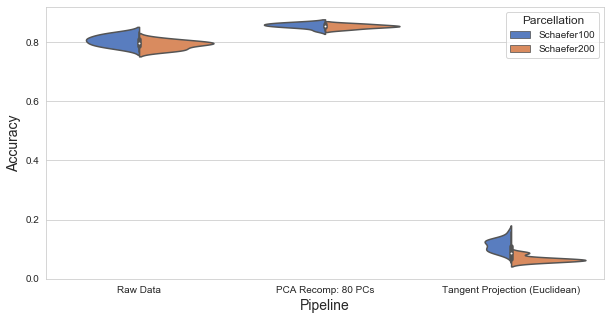

In [19]:
ax = sns.violinplot(x="Pipeline", y="Accuracy", hue="Parcellation",
                    data=result, palette="muted", split=True, legend=False)
fig = ax.get_figure()

fig.set_size_inches(10,5)
plt.savefig('DL_pipelines_schaefer_unrelated.eps', bbox_inches='tight', transparent=True)
plt.show()

## Task Classification on Closest FC without DL

In [11]:
distances = pd.read_csv('distances_task.csv', names=["Type", "Accuracy"])
new = distances["Type"].str.rsplit("_", n = 1, expand = True) 
distances['Tangent Reference'] = new[0]
distances['Distance'] = new[1]
distances.drop(columns =["Type"], inplace = True) 
distances.head()

,Accuracy,Tangent Reference,Distance
0,0.891447,euclid,corr
1,0.875000,euclid,cosine
2,0.128289,euclid,euclidean
3,0.871711,harmonic,corr
4,0.907895,harmonic,cosine


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 720x360 with 0 Axes>

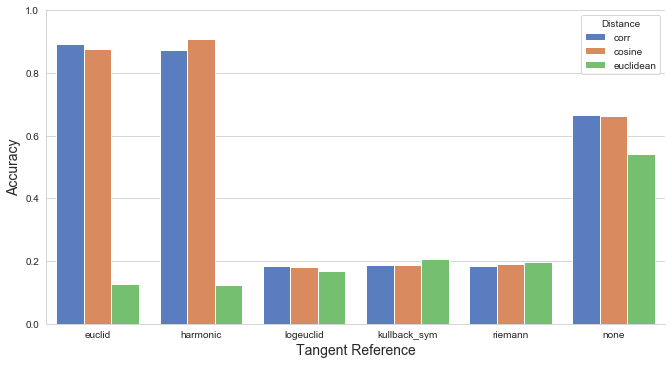

In [12]:
sns.set_style("whitegrid")
plt.tight_layout()
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=distances,
                height=6, kind="bar", palette="muted", legend_out=False).set(ylim=(0, 1))
ref_plot.fig.set_size_inches(10,5)
plt.savefig('distance_task.eps', bbox_inches='tight', transparent=True)
plt.show()

## Subject Classification on Closest FC without DL

In [13]:
distances = pd.read_csv('distances_subject.csv', names=["Type", "Accuracy"])
new = distances["Type"].str.rsplit("_", n = 1, expand = True) 
distances['Tangent Reference'] = new[0]
distances['Distance'] = new[1]
distances.drop(columns =["Type"], inplace = True) 
distances.head()

,Accuracy,Tangent Reference,Distance
0,0.019737,euclid,corr
1,0.019737,euclid,cosine
2,0.019737,euclid,euclidean
3,0.003289,harmonic,corr
4,0.003289,harmonic,cosine


<Figure size 720x360 with 0 Axes>

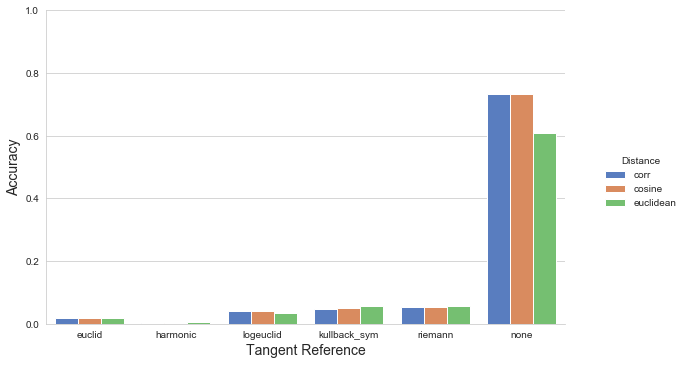

In [14]:

plt.tight_layout()
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=distances,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
#ref_plot.fig.suptitle('HCP100 Subject Classification Accuracy with Closest FC', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('distance_subj.png', bbox_inches='tight')
plt.show()

### KNN Classification, k = 30

In [15]:
knn_distances = pd.read_csv('knn_distances_task.csv', names=["Type", "Accuracy"])
new = knn_distances["Type"].str.rsplit("_", n = 1, expand = True) 
knn_distances['Tangent Reference'] = new[0]
knn_distances['Distance'] = new[1]
knn_distances.drop(columns =["Type"], inplace = True) 
knn_distances.head()

,Accuracy,Tangent Reference,Distance
0,0.868421,euclid,correlation
1,0.848684,euclid,cosine
2,0.125000,euclid,euclidean
3,0.875000,harmonic,correlation
4,0.875000,harmonic,cosine


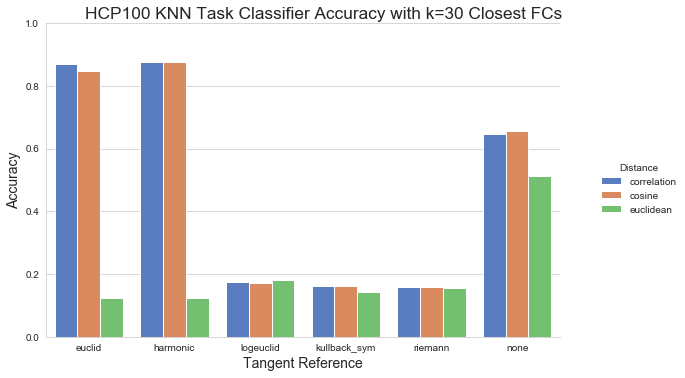

In [16]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=knn_distances,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('HCP100 KNN Task Classifier Accuracy with k=30 Closest FCs', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('knn_classification.eps', bbox_inches='tight', transparent=True)
plt.show()

### Subject Classification - KNN 

In [17]:
knn_subject = pd.read_csv('knn_distances_subject.csv', names=["Type", "Accuracy"])
new = knn_subject["Type"].str.rsplit("_", n = 1, expand = True) 
knn_subject['Tangent Reference'] = new[0]
knn_subject['Distance'] = new[1]
knn_subject.drop(columns =["Type"], inplace = True) 
knn_subject.head()

,Accuracy,Tangent Reference,Distance
0,0.0,euclid,correlation
1,0.0,euclid,cosine
2,0.0,euclid,euclidean
3,0.0,harmonic,correlation
4,0.0,harmonic,cosine


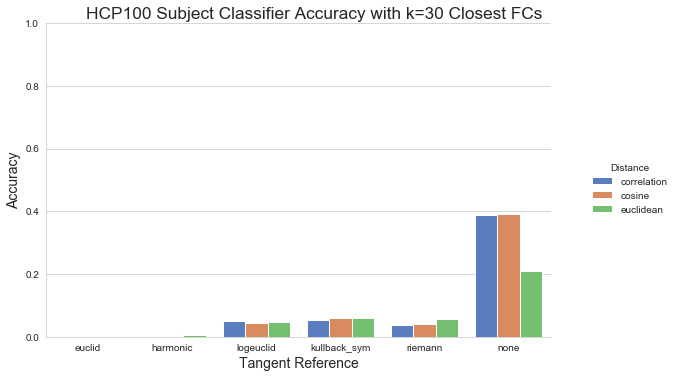

In [18]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=knn_subject,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('HCP100 Subject Classifier Accuracy with k=30 Closest FCs', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('knn_subj.eps', bbox_inches='tight', transparent=True)
plt.show()

## Schaefer Parcellations

In [19]:
schaefer = pd.read_csv('schaefer_distances.csv', names=["Type", "Accuracy"])
new = schaefer["Type"].str.rsplit("_", n = 1, expand = True) 
schaefer['Parcellation'] = new[0]
schaefer['Tangent Reference'] = new[1]
schaefer.drop(columns =["Type"], inplace = True) 
schaefer.head()

,Accuracy,Parcellation,Tangent Reference
0,0.144853,Schaefer100,Euclid
1,0.152941,Schaefer100,Harmonic
2,0.809559,Schaefer100,None
3,0.136765,Schaefer200,Euclid
4,0.119118,Schaefer200,Harmonic


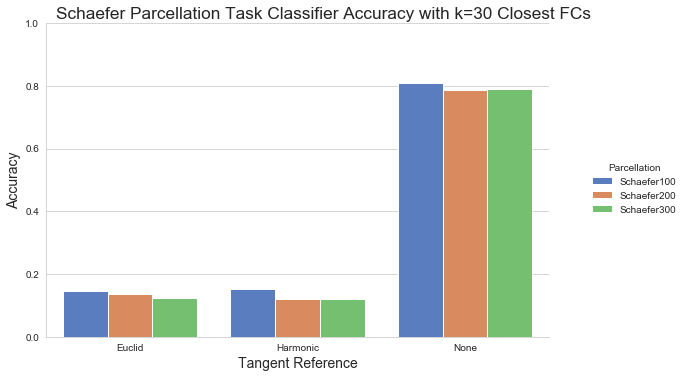

In [20]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Parcellation", data=schaefer,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('Schaefer Parcellation Task Classifier Accuracy with k=30 Closest FCs', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('knn_task.eps', bbox_inches='tight', transparent=True)
plt.show()

In [21]:
def utri2mat(utri):
    n = int(-1 + np.sqrt(1 + 8 * len(utri))) // 2
    iu1 = np.triu_indices(n)
    ret = np.empty((n, n))
    ret[iu1] = utri
    ret.T[iu1] = utri
    return ret

In [22]:
import pickle
with open('../data/schaefer100.pickle', 'rb') as f:
    all_parc = pickle.load(f)

In [23]:
plt.style.use('default')
sampleFC = utri2mat(all_parc[0])
plt.imshow(sampleFC,origin='lower')
plt.colorbar()
plt.ylabel('Brain Region')
plt.xlabel('Brain Region')
plt.savefig('example_FC.eps', bbox_inches='tight', transparent=True)
plt.show()

ValueError: shape mismatch: value array of shape (113,113) could not be broadcast to indexing result of shape (105,)

In [24]:
schaefer_knn = pd.read_csv('schaefer_300_task_float32.csv', names=["Type", "Accuracy"])

In [25]:
new = schaefer_knn["Type"].str.rsplit("_", n = 1, expand = True) 
new2 = new[0].str.split("_", n = 1, expand = True) 

In [26]:
schaefer_knn['Parcellation'] = new[1]
schaefer_knn['Tangent Reference'] = new2[1]
schaefer_knn['K'] = new2[0]
schaefer_knn.drop(columns =["Type"], inplace = True) 
#schaefer_knn['K'] = schaefer_knn['K'].replace(['5'], '30')
schaefer_knn['K'] = schaefer_knn['K'].astype(int)

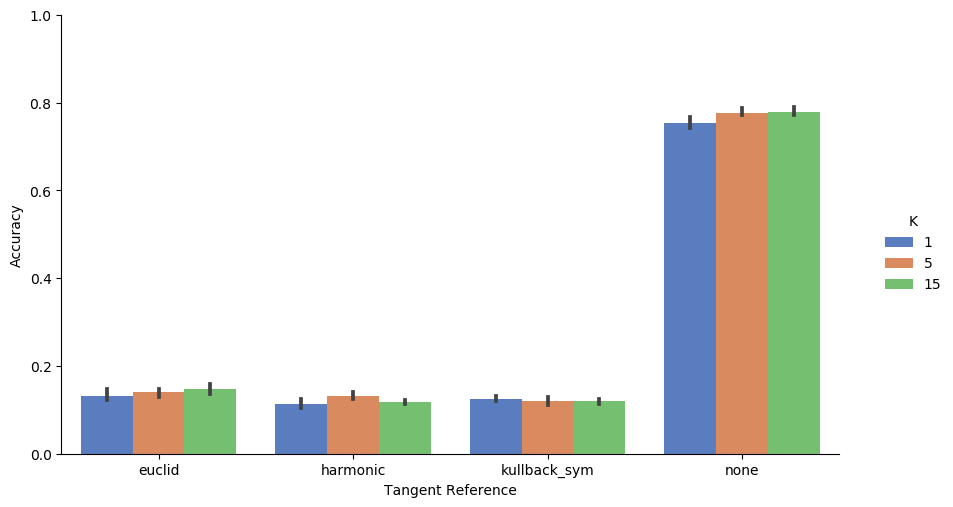

In [27]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="K", data=schaefer_knn,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.set_size_inches(10,5)
plt.savefig('schaefer_k.eps', bbox_inches='tight', transparent=True)
plt.show()